In [4]:
import fxcmpy
import pandas as pd 
import time
import numpy as np
import datetime as dt
import cufflinks as cf
from pylab import plt
cf.set_config_file(offline=True)
plt.style.use('seaborn')
%matplotlib inline

In [5]:
TOKEN = '04a6b90b8a0f1ffab2e78ed6128798800a27b8b7' # Token demo
con = fxcmpy.fxcmpy(access_token = TOKEN, log_level = 'error', server = 'demo')

In [6]:
con.close()

In [32]:
start = dt.datetime(2015, 1, 12)
end = dt.datetime(2021, 2, 12)
df = con.get_candles('EUR/USD', period='D1',
                start=start, end=end)

In [34]:
df.head(20
       )

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2015-01-13 22:00:00,1.18325,1.17716,1.18588,1.17522,1.18346,1.17750,1.18605,1.17539,230968
2015-01-14 22:00:00,1.17716,1.17868,1.18457,1.17266,1.17750,1.17902,1.18471,1.17281,279561
2015-01-15 22:00:00,1.17868,1.16288,1.17922,1.15660,1.17902,1.16338,1.17940,1.15685,475404
2015-01-16 22:00:00,1.16288,1.15574,1.16480,1.14586,1.16338,1.15674,1.16499,1.14609,387794
2015-01-18 22:00:00,1.15574,1.15510,1.15553,1.15426,1.15674,1.15580,1.15614,1.15472,618
2015-01-19 22:00:00,1.15510,1.16004,1.16382,1.15498,1.15580,1.16059,1.16398,1.15523,242820
2015-01-20 22:00:00,1.16004,1.15466,1.16142,1.15396,1.16059,1.15512,1.16168,1.15413,217352
2015-01-21 22:00:00,1.15466,1.16070,1.16789,1.15406,1.15512,1.16127,1.16825,1.15423,257875
2015-01-22 22:00:00,1.16070,1.13640,1.16503,1.13152,1.16127,1.13667,1.16734,1.13172,356718


In [35]:
fx = df[['bidclose','askclose']]

In [25]:
from pyti.exponential_moving_average import exponential_moving_average as ema

In [26]:
# Define EMA Fast and Slow
ema_fast = 12
ema_slow = 26

# Populate dataframe with EMAs

fx['EMA_fast'] = ema(fx['askclose'], ema_fast)
fx['EMA_slow'] = ema(fx['askclose'], ema_slow)

In [27]:
fx.head(30)

,bidclose,askclose,EMA_fast,EMA_slow
date,,,,
2015-01-13 22:00:00,1.17716,1.17750,NaN,NaN
2015-01-14 22:00:00,1.17868,1.17902,NaN,NaN
2015-01-15 22:00:00,1.16288,1.16338,NaN,NaN
2015-01-16 22:00:00,1.15574,1.15674,NaN,NaN
2015-01-18 22:00:00,1.15510,1.15580,NaN,NaN
2015-01-19 22:00:00,1.16004,1.16059,NaN,NaN
2015-01-20 22:00:00,1.15466,1.15512,NaN,NaN
2015-01-21 22:00:00,1.16070,1.16127,NaN,NaN
2015-01-22 22:00:00,1.13640,1.13667,NaN,NaN


In [28]:
fx.to_clipboard(sep=',')  

In [32]:
fx[['askclose']].rolling(12).mean().head(20)

,askclose
date,
2015-01-13 22:00:00,NaN
2015-01-14 22:00:00,NaN
2015-01-15 22:00:00,NaN
2015-01-16 22:00:00,NaN
2015-01-18 22:00:00,NaN
2015-01-19 22:00:00,NaN
2015-01-20 22:00:00,NaN
2015-01-21 22:00:00,NaN
2015-01-22 22:00:00,NaN


In [38]:
sma12 = fx[['askclose']].rolling(12).mean()

In [39]:
fx2 = fx[['askclose']]
fx2.iloc[0:12] = sma12[0:12]
fx2.head(30)

,askclose
date,
2015-01-13 22:00:00,NaN
2015-01-14 22:00:00,NaN
2015-01-15 22:00:00,NaN
2015-01-16 22:00:00,NaN
2015-01-18 22:00:00,NaN
2015-01-19 22:00:00,NaN
2015-01-20 22:00:00,NaN
2015-01-21 22:00:00,NaN
2015-01-22 22:00:00,NaN


In [40]:
ema12 = fx2.ewm(span=12, adjust=False).mean()

In [41]:
ema12.head(30)

,askclose
date,
2015-01-13 22:00:00,NaN
2015-01-14 22:00:00,NaN
2015-01-15 22:00:00,NaN
2015-01-16 22:00:00,NaN
2015-01-18 22:00:00,NaN
2015-01-19 22:00:00,NaN
2015-01-20 22:00:00,NaN
2015-01-21 22:00:00,NaN
2015-01-22 22:00:00,NaN


In [46]:
def ema(prices, periods):
    sma = prices.rolling(periods).mean()
    prices.iloc[0:periods] = sma[0:periods]
    return prices.ewm(span=periods, adjust=False).mean()

In [52]:
ema_12 = ema(fx[['askclose']], 12)
ema_12

,askclose
date,
2015-01-13 22:00:00,NaN
2015-01-14 22:00:00,NaN
2015-01-15 22:00:00,NaN
2015-01-16 22:00:00,NaN
2015-01-18 22:00:00,NaN
...,...
2021-02-08 22:00:00,1.206958
2021-02-09 22:00:00,1.207751
2021-02-10 22:00:00,1.208404


In [77]:
ema_26 = ema(fx[['askclose']], 26)
ema_26

,askclose
date,
2015-01-13 22:00:00,NaN
2015-01-14 22:00:00,NaN
2015-01-15 22:00:00,NaN
2015-01-16 22:00:00,NaN
2015-01-18 22:00:00,NaN
...,...
2021-02-08 22:00:00,1.210416
2021-02-09 22:00:00,1.210541
2021-02-10 22:00:00,1.210649


In [69]:
ema_26.index = pd.to_datetime(ema_26.index, format="%Y%m%d").to_period('D')

In [70]:
ema_26

,askclose
date,
2015-01-13,NaN
2015-01-14,NaN
2015-01-15,NaN
2015-01-16,NaN
2015-01-18,NaN
...,...
2021-02-08,1.210416
2021-02-09,1.210541
2021-02-10,1.210649


In [75]:
ema_26["2020":]

,askclose
date,
2020-01-02,1.112348
2020-01-03,1.112629
2020-01-05,1.112967
2020-01-06,1.113473
2020-01-07,1.113624
...,...
2021-02-08,1.210416
2021-02-09,1.210541
2021-02-10,1.210649


In [59]:
df_fx=fx[['askclose']]

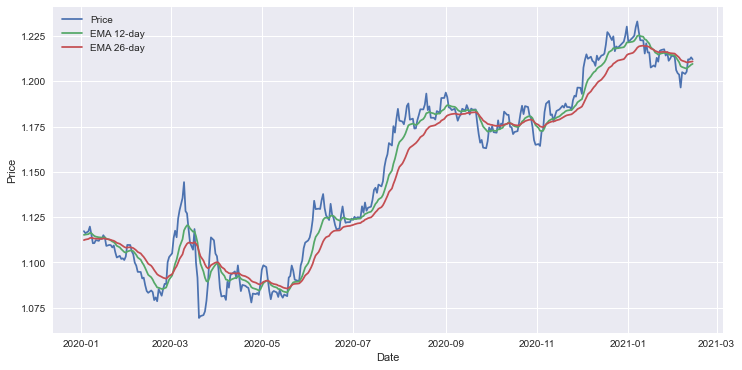

In [79]:
plt.figure(figsize = (12,6))
plt.plot(df_fx['2020':], label="Price")
plt.plot(ema_12['2020':], label="EMA 12-day")
plt.plot(ema_26['2020':], label="EMA 26-day")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [83]:
df_fx['ema_12']=ema_12
df_fx['ema_26'] = ema_26
df_fx.head(30)

,askclose,ema_12,ema_26
date,,,
2015-01-13 22:00:00,1.17750,NaN,NaN
2015-01-14 22:00:00,1.17902,NaN,NaN
2015-01-15 22:00:00,1.16338,NaN,NaN
2015-01-16 22:00:00,1.15674,NaN,NaN
2015-01-18 22:00:00,1.15580,NaN,NaN
2015-01-19 22:00:00,1.16059,NaN,NaN
2015-01-20 22:00:00,1.15512,NaN,NaN
2015-01-21 22:00:00,1.16127,NaN,NaN
2015-01-22 22:00:00,1.13667,NaN,NaN


In [89]:
macd_line = df_fx['ema_12']-df_fx['ema_26']
macd_line.head(30)

date
2015-01-13 22:00:00         NaN
2015-01-14 22:00:00         NaN
2015-01-15 22:00:00         NaN
2015-01-16 22:00:00         NaN
2015-01-18 22:00:00         NaN
2015-01-19 22:00:00         NaN
2015-01-20 22:00:00         NaN
2015-01-21 22:00:00         NaN
2015-01-22 22:00:00         NaN
2015-01-23 22:00:00         NaN
2015-01-25 22:00:00         NaN
2015-01-26 22:00:00         NaN
2015-01-27 22:00:00         NaN
2015-01-28 22:00:00         NaN
2015-01-29 22:00:00         NaN
2015-01-30 22:00:00         NaN
2015-02-01 22:00:00         NaN
2015-02-02 22:00:00         NaN
2015-02-03 22:00:00         NaN
2015-02-04 22:00:00         NaN
2015-02-05 22:00:00         NaN
2015-02-06 22:00:00         NaN
2015-02-08 22:00:00         NaN
2015-02-09 22:00:00         NaN
2015-02-10 22:00:00         NaN
2015-02-11 22:00:00   -0.005980
2015-02-12 22:00:00   -0.005177
2015-02-13 22:00:00   -0.004606
2015-02-15 22:00:00   -0.004018
2015-02-16 22:00:00   -0.003863
dtype: float64

In [92]:
macd_signal = ema(macd_line, 9)
macd_signal.head(30)

date
2015-01-13 22:00:00         NaN
2015-01-14 22:00:00         NaN
2015-01-15 22:00:00         NaN
2015-01-16 22:00:00         NaN
2015-01-18 22:00:00         NaN
2015-01-19 22:00:00         NaN
2015-01-20 22:00:00         NaN
2015-01-21 22:00:00         NaN
2015-01-22 22:00:00         NaN
2015-01-23 22:00:00         NaN
2015-01-25 22:00:00         NaN
2015-01-26 22:00:00         NaN
2015-01-27 22:00:00         NaN
2015-01-28 22:00:00         NaN
2015-01-29 22:00:00         NaN
2015-01-30 22:00:00         NaN
2015-02-01 22:00:00         NaN
2015-02-02 22:00:00         NaN
2015-02-03 22:00:00         NaN
2015-02-04 22:00:00         NaN
2015-02-05 22:00:00         NaN
2015-02-06 22:00:00         NaN
2015-02-08 22:00:00         NaN
2015-02-09 22:00:00         NaN
2015-02-10 22:00:00         NaN
2015-02-11 22:00:00   -0.005980
2015-02-12 22:00:00   -0.005819
2015-02-13 22:00:00   -0.005577
2015-02-15 22:00:00   -0.005265
2015-02-16 22:00:00   -0.004985
dtype: float64

In [91]:
macd_histogram = macd_line - macd_signal
macd_histogram

date
2015-01-13 22:00:00         NaN
2015-01-14 22:00:00         NaN
2015-01-15 22:00:00         NaN
2015-01-16 22:00:00         NaN
2015-01-18 22:00:00         NaN
                         ...   
2021-02-08 22:00:00   -0.000824
2021-02-09 22:00:00   -0.000125
2021-02-10 22:00:00    0.000336
2021-02-11 22:00:00    0.000709
2021-02-12 22:00:00    0.000855
Length: 1890, dtype: float64

In [95]:
def macd(prices, slow, fast, smooth):
    ema_fast = ema(prices, fast)
    ema_slow = ema(prices, slow)
    macd = pd.DataFrame(ema_fast - ema_slow).rename(columns = {'askclose':'macd'})
    signal = pd.DataFrame(ema(macd, smooth)).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd']- signal['signal']).rename(columns = {0:'hist'})
    frames = [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df
    

In [96]:
macd(fx[['askclose']], 26, 12, 9)

,macd,signal,hist
date,,,
2015-01-13 22:00:00,NaN,NaN,NaN
2015-01-14 22:00:00,NaN,NaN,NaN
2015-01-15 22:00:00,NaN,NaN,NaN
2015-01-16 22:00:00,NaN,NaN,NaN
2015-01-18 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-02-08 22:00:00,-0.003458,-0.002634,-0.000824
2021-02-09 22:00:00,-0.002791,-0.002665,-0.000125
2021-02-10 22:00:00,-0.002245,-0.002581,0.000336


In [2]:
import fx_ind

In [161]:
con.close()

In [162]:
con.is_connected()


False

In [7]:
start = dt.datetime(2015, 1, 12)
end = dt.datetime(2021, 2, 12)
prices = fx_ind.get_historical_data('EUR/USD', start, end, TOKEN)

In [8]:
prices

,askclose
date,
2015-01-13 22:00:00,1.17750
2015-01-14 22:00:00,1.17902
2015-01-15 22:00:00,1.16338
2015-01-16 22:00:00,1.15674
2015-01-18 22:00:00,1.15580
...,...
2021-02-08 22:00:00,1.20527
2021-02-09 22:00:00,1.21211
2021-02-10 22:00:00,1.21200


In [9]:
eur_usd_mcd= fx_ind.macd(prices, 26, 12, 9)
eur_usd_mcd.head(40)

,macd,signal,hist
date,,,
2015-01-13 22:00:00,NaN,NaN,NaN
2015-01-14 22:00:00,NaN,NaN,NaN
2015-01-15 22:00:00,NaN,NaN,NaN
2015-01-16 22:00:00,NaN,NaN,NaN
2015-01-18 22:00:00,NaN,NaN,NaN
2015-01-19 22:00:00,NaN,NaN,NaN
2015-01-20 22:00:00,NaN,NaN,NaN
2015-01-21 22:00:00,NaN,NaN,NaN
2015-01-22 22:00:00,NaN,NaN,NaN


In [14]:
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (40, 20)
plt.style.use('fivethirtyeight')

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
prices

,askclose
date,
2015-01-13 22:00:00,1.17750
2015-01-14 22:00:00,1.17902
2015-01-15 22:00:00,1.16338
2015-01-16 22:00:00,1.15674
2015-01-18 22:00:00,1.15580
...,...
2021-02-08 22:00:00,1.20527
2021-02-09 22:00:00,1.21211
2021-02-10 22:00:00,1.21200


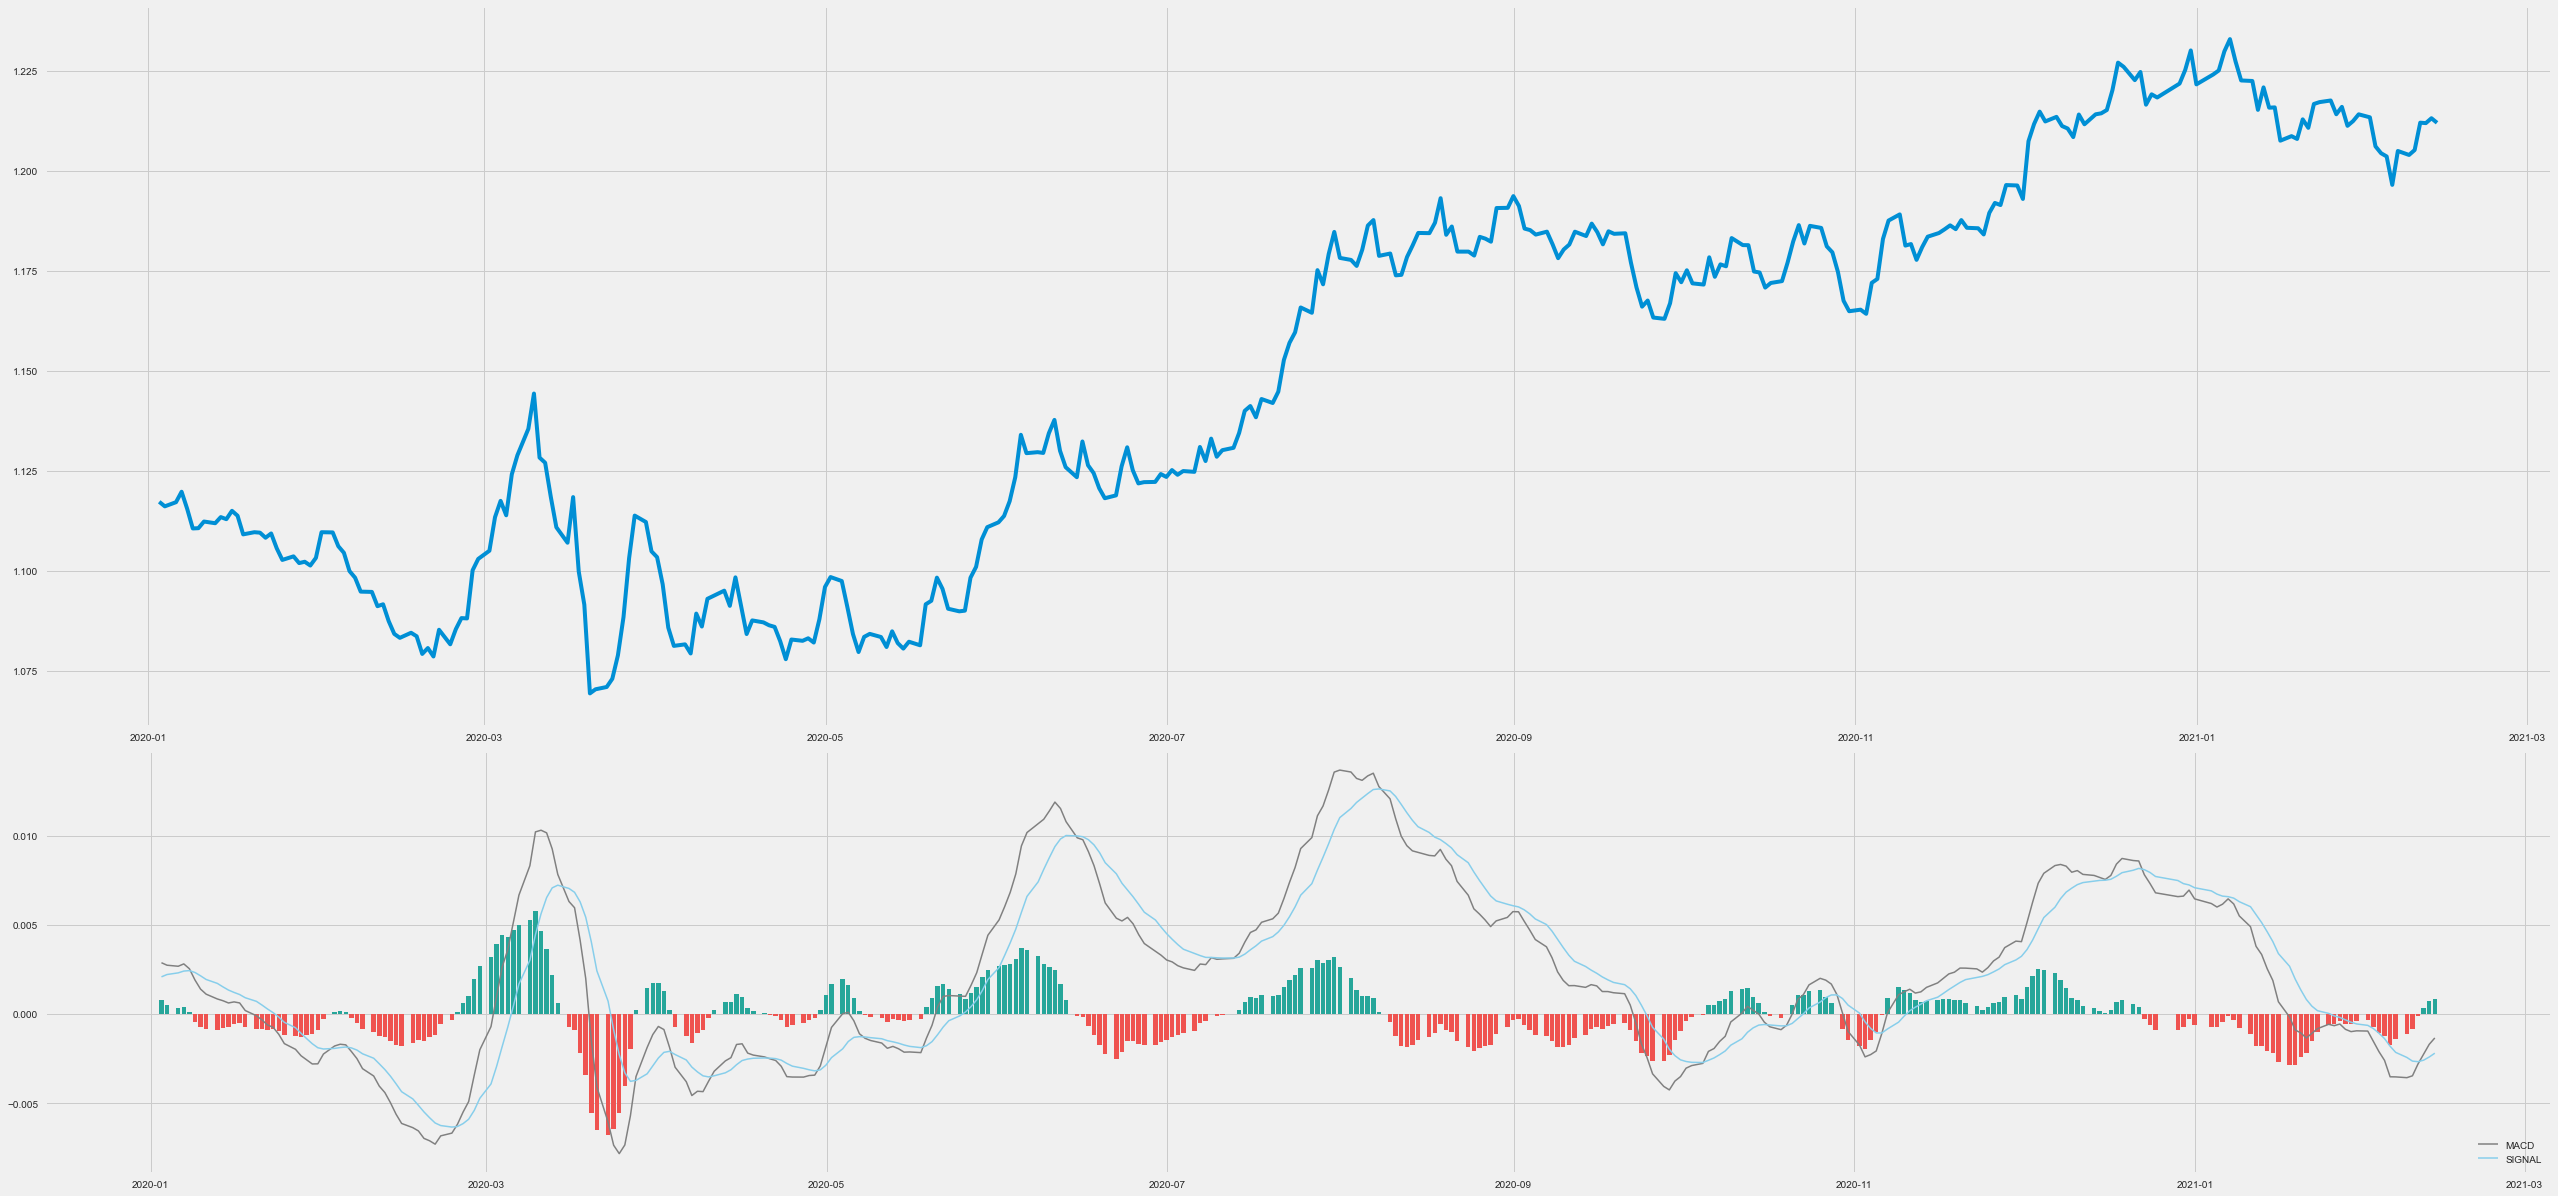

In [15]:
fx_ind.plot_macd(prices['2020':], eur_usd_mcd['macd']['2020':], eur_usd_mcd['signal']['2020':], eur_usd_mcd['hist']['2020':] )

In [60]:
fx_prices = prices
fx_prices

,askclose
date,
2015-01-13 22:00:00,1.17750
2015-01-14 22:00:00,1.17902
2015-01-15 22:00:00,1.16338
2015-01-16 22:00:00,1.15674
2015-01-18 22:00:00,1.15580
...,...
2021-02-08 22:00:00,1.20527
2021-02-09 22:00:00,1.21211
2021-02-10 22:00:00,1.21200


In [66]:
buy_price, sell_price, macd_signal = fx_ind.implement_macd_strategy(fx_prices['askclose'], eur_usd_mcd)
buy_price, sell_price, macd_signal

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.14057,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.06608,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.08132,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.12757,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  na

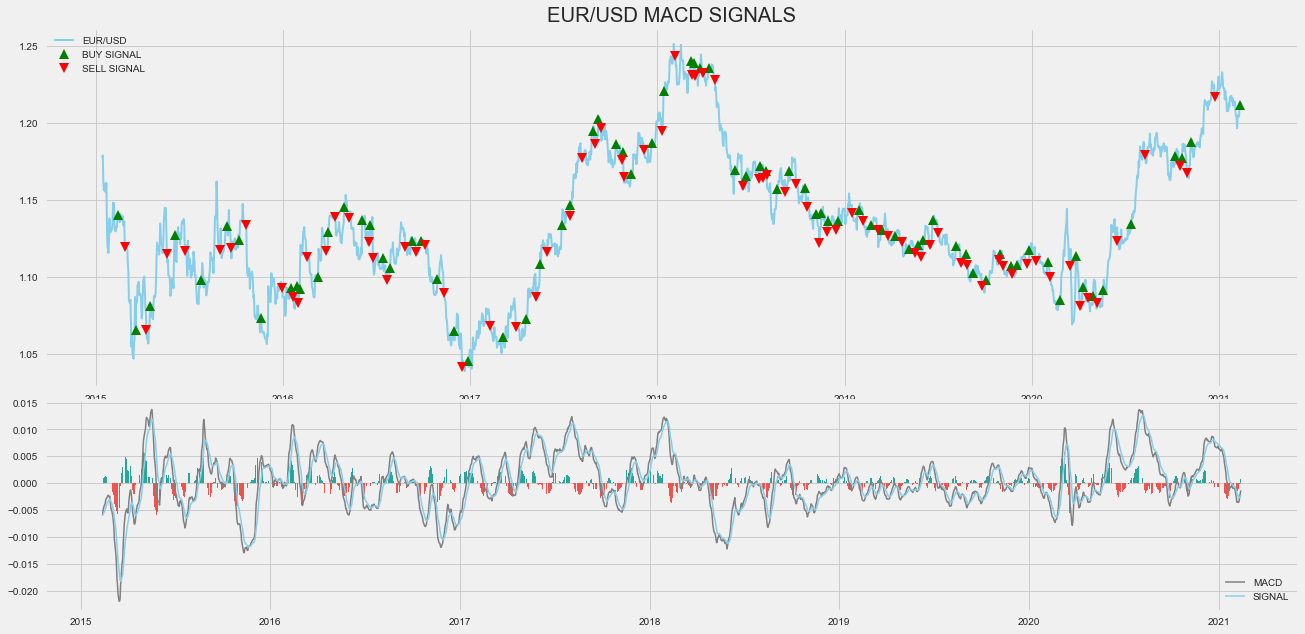

In [67]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(fx_prices['askclose'], color = 'skyblue', linewidth = 2, label = 'EUR/USD')
ax1.plot(fx_prices.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(fx_prices.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('EUR/USD MACD SIGNALS')
ax2.plot(eur_usd_mcd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(eur_usd_mcd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(eur_usd_mcd)):
    if str(eur_usd_mcd['hist'][i])[0] == '-':
        ax2.bar(eur_usd_mcd.index[i], eur_usd_mcd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(eur_usd_mcd.index[i], eur_usd_mcd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()